# Задание
1. Сгенерировать данные, повторяющие примеры из лекций (U-образные, концентрические окружности, XOR, с выбросами), и реализовать на них различные версии метода k ближайших соседей в задачах классификации и регрессии, включая радиусный классификатор, взвешенные методы k ближайших соседей и ядерные функции.
2. Применить метод k ближайших соседей для решения задач классификации и регрессии с использованием собственных пользовательских данных.
3. Сгенерировать данные, повторяющие пример из лекций для полиномиального обогащения и реализовать решение задачи классификации с использованием метода опорных векторов.
4. Реализовать метод опорных векторов для различных ядерных функций для классификации модельных и реальных пользовательских данных.
5. Реализовать регрессионную версию метода опорных векторов и применить к собственным пользовательским данным.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

## Сгенерируем данные для задания №1
## XOR

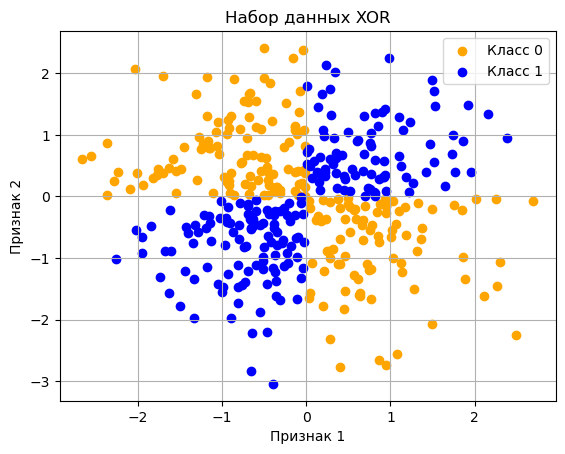

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных XOR
np.random.seed(0)
X = np.random.randn(500, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
Y = np.where(Y, 1, -1)

# Разделение данных на два класса
class1 = X[Y == 1]
class2 = X[Y == -1]


x1XOR = class1[:, 0]
y1XOR = class1[:, 1]
x2XOR = class2[:, 0]
y2XOR = class2[:, 1]


x1XOR = x1XOR[:200]
y1XOR = y1XOR[:200]
x2XOR = x2XOR[:200]
y2XOR = y2XOR[:200]
# Визуализация данных
plt.scatter(x1XOR, y1XOR, c='orange', label='Класс 0')
plt.scatter(x2XOR, y2XOR, c='blue', label='Класс 1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.title('Набор данных XOR')
plt.grid(True)
plt.show()


## OUTLIERS

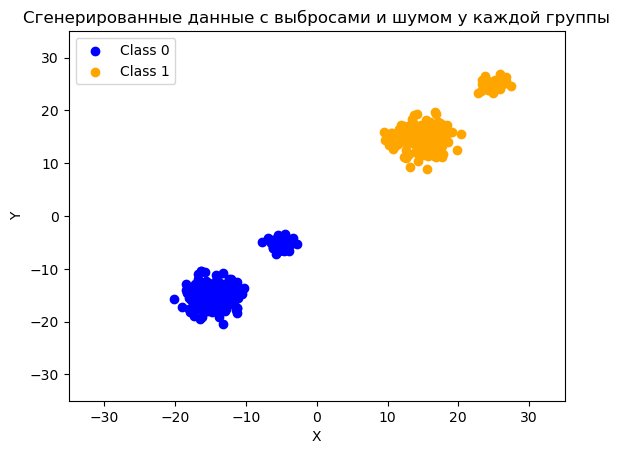

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем набор данных для класса 0
np.random.seed(0)
class_0_x = np.random.normal(-15, 2, 160)
class_0_y = np.random.normal(-15, 2, 160)

# Создаем выбросы для класса 0
outliers_class_0_x = np.random.normal(-5, 1, 40)
outliers_class_0_y = np.random.normal(-5, 1, 40)

# Создаем набор данных для класса 1
class_1_x = np.random.normal(15, 2, 160)
class_1_y = np.random.normal(15, 2, 160)

# Создаем выбросы для класса 1
outliers_class_1_x = np.random.normal(25, 1, 40)
outliers_class_1_y = np.random.normal(25, 1, 40)

# Добавляем шум к обоим наборам данных
noise_x = np.random.normal(0, 0, 20)
noise_y = np.random.normal(0, 0, 20)

# Объединяем данные классов, выбросов и шума
x1OL = np.concatenate((class_0_x, outliers_class_0_x))
y1OL = np.concatenate((class_0_y, outliers_class_0_y))
x2OL = np.concatenate((class_1_x, outliers_class_1_x))
y2OL = np.concatenate((class_1_y, outliers_class_1_y))

# Визуализация данных
plt.scatter(x1OL, y1OL, c='blue', label='Class 0')
plt.scatter(x2OL, y2OL, c='orange', label='Class 1')

plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сгенерированные данные с выбросами и шумом у каждой группы')
plt.show()


## CIRCLES

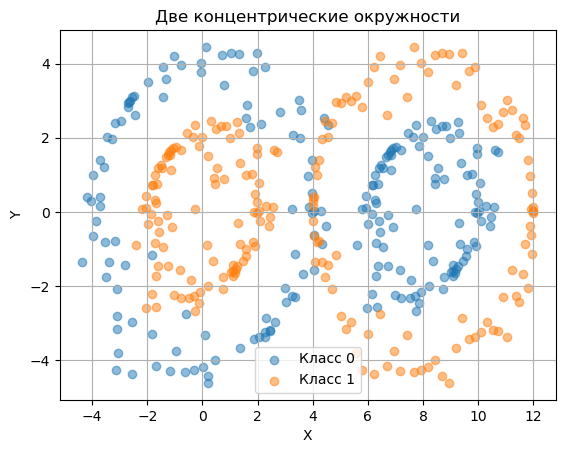

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем данные для первой окружности
theta1 = np.linspace(0, 2 * np.pi, 100)
radius1 = 4.0  # Радиус первой окружности
x1 = radius1 * np.cos(theta1)
y1 = radius1 * np.sin(theta1)

# Создаем данные для второй окружности
theta2 = np.linspace(0, 2 * np.pi, 100)
radius2 = 4.0  # Радиус второй окружности
x2 = radius2 * np.cos(theta2)
y2 = radius2 * np.sin(theta2)

# Создаем шум для обоих групп данных
noise = 0.5 * np.random.randn(100)
x1 += noise
y1 += noise

# Сдвигаем вторую окружность рядом с первой
x2 += 8  # Измените этот параметр для регулировки расстояния между окружностями
y2 += noise

#----------------
#Создадим еще по кругу внутри кругов
theta3 = np.linspace(0, 2 * np.pi, 100)
radius3 = 2.0  # Радиус первой окружности
x3 = radius3 * np.cos(theta1)
y3 = radius3 * np.sin(theta1)
x3+=noise
y3+=noise
# Создаем данные для второй окружности
theta4 = np.linspace(0, 2 * np.pi, 100)
radius4 = 2.0  # Радиус второй окружности
x4 = radius4 * np.cos(theta2)
x4+=8
y4 = radius4 * np.sin(theta2)
x4+=noise
y4+=noise

x1C = np.concatenate((x1,x4))
y1C = np.concatenate((y1,y4))

x2C = np.concatenate((x2,x3))
y2C = np.concatenate((y2,y3))

#----------------

# Визуализируем данные
plt.scatter(x1C, y1C, label='Класс 0',alpha=0.5)
plt.scatter(x2C, y2C, label='Класс 1',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Две концентрические окружности')
plt.grid(True)
plt.show()


## Moons

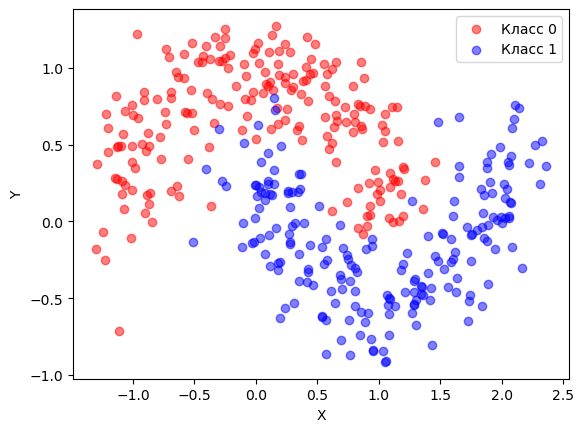

In [161]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Создаем набор данных с 100 сэмплами
X, y = make_moons(n_samples=400, shuffle=True, noise=0.2, random_state=42)

# X содержит признаки, y содержит метки классов (0 или 1)


x1moon = X[y == 0][:, 0]
y1moon = X[y == 0][:, 1]

x2moon = X[y == 1][:, 0]
y2moon =  X[y == 1][:, 1]

# Визуализируем созданный набор данных
plt.scatter(x1moon, y1moon, color='r', label='Класс 0', alpha=0.5)
plt.scatter(x2moon,y2moon, color='b', label='Класс 1', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Соединим наборы и сделаем удобные датафреймы

In [195]:
yf = [0 for i in range(200)]
yf = np.array(yf)
yf.shape

yt = [1 for i in range(200)]
yt = np.array(yt)
yf.shape

ymain = np.concatenate((yf, yt))

In [183]:
df = pd.DataFrame({'x1xor':x1XOR, 'y1xor':y1XOR, 'ym0XOR':yf, 'x2xor':x2XOR, 'y2xor':y2XOR, 'ym1XOR':yt, 
                   'x1ol':x1OL, 'y1ol':y1OL, 'ym0ol':yf, 'x2ol':x2OL, 'y2ol':y2OL, 'ym1OL':yt,
                   'x1c':x1C, 'y1c':y1C,'ym0c':yf, 'x2c':x2C, 'y2c':y2C, 'ym1c':yt,
                   'x1m':x1moon, 'y1m':y1moon,'ym0m':yf, 'x2m':x2moon, 'y2m':y2moon, 'ym1m':yt
                  })
XOR1 = pd.DataFrame({'x':x1XOR, 'y':y1XOR, 'ymain':yf})
XOR2 = pd.DataFrame({'x':x2XOR, 'y':y2XOR, 'ymain':yt})
XOR = pd.concat([XOR1, XOR2])

Outliers1 = pd.DataFrame({'x':x1OL, 'y':y1OL, 'ymain':yf})
Outliers2 = pd.DataFrame({'x':x2OL, 'y':y2OL, 'ymain':yt})
Outliers = pd.concat([Outliers1, Outliers2])

Circles1 = pd.DataFrame({'x':x1C, 'y':y1C, 'ymain':yf})
Circles2 = pd.DataFrame({'x':x2C, 'y':y2C, 'ymain':yt})
Circles = pd.concat([Circles1, Circles2])

Moon1 = pd.DataFrame({'x':x1moon, 'y':y1moon, 'ymain':yf})
Moon2 = pd.DataFrame({'x':x2moon, 'y':y2moon, 'ymain':yt})
Moon = pd.concat([Moon1, Moon2])

## Визуализируем полученные наборы данных

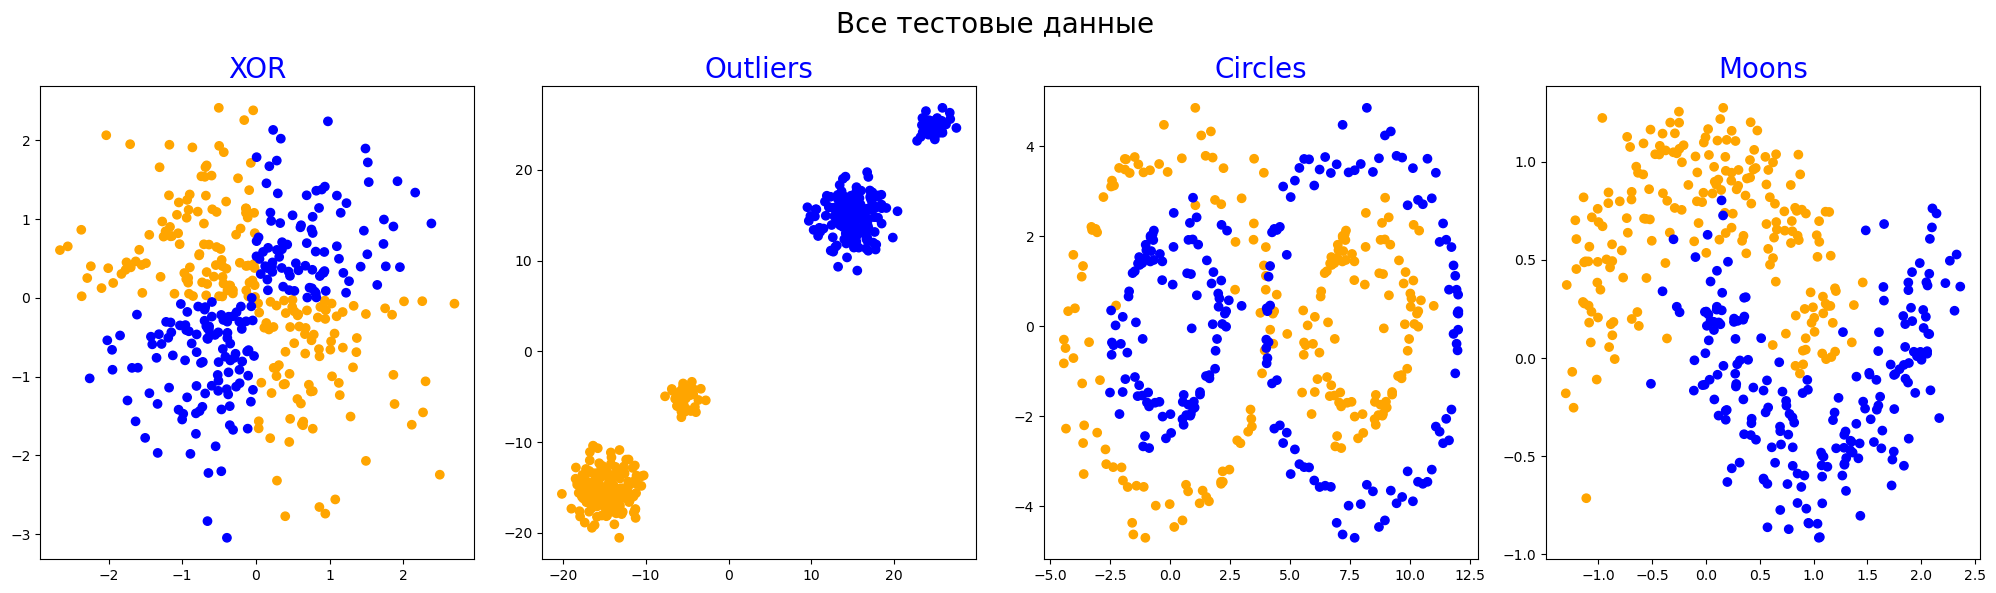

In [260]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
fig.suptitle('Все тестовые данные', size=20)
axes[0].scatter(x=XOR['x'], y=XOR['y'], c=XOR['ymain'].map({0: 'orange', 1: 'blue'}))
axes[0].set_title('XOR', size=20, color = 'Blue')

axes[1].scatter(x=Outliers['x'], y=Outliers['y'], c=Outliers['ymain'].map({0: 'orange', 1: 'blue'}))
axes[1].set_title('Outliers', size=20, color = 'Blue')

axes[2].scatter(x=Circles['x'], y=Circles['y'], c=Circles['ymain'].map({0: 'orange', 1: 'blue'}))
axes[2].set_title('Circles', size=20, color = 'Blue')

axes[3].scatter(x=Moon['x'], y=Moon['y'], c=Moon['ymain'].map({0: 'orange', 1: 'blue'}))
axes[3].set_title('Moons', size=20, color = 'Blue')

plt.tight_layout()


## Приступим к заданию №1

### Сгенерировать данные, повторяющие примеры из лекций (U-образные, концентрические окружности, XOR, с выбросами), и реализовать на них различные версии метода k ближайших соседей в задачах классификации и регрессии, включая радиусный классификатор, взвешенные методы k ближайших соседей и ядерные функции.

### --- Задача классификации ---

### XOR

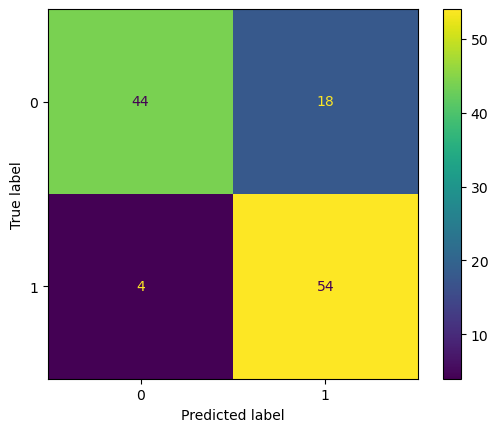

In [237]:
#Для XOR
Xxor = XOR.drop('ymain', axis = 1)
yxor = XOR['ymain']

#Сплит
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xxor, yxor, test_size=0.3, random_state=42)

#Модель с радиусом 3
clf = RadiusNeighborsClassifier(radius=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Confusion matrix
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [242]:
roc_auc_score(y_test, y_pred)

0.8203559510567296

In [269]:
#Учим модель с другими параметрами R
clf1 = RadiusNeighborsClassifier(radius=0.9)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

clf2 = RadiusNeighborsClassifier(radius=3)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

Text(0.5, 1.0, 'Предсказанные метки r=3')

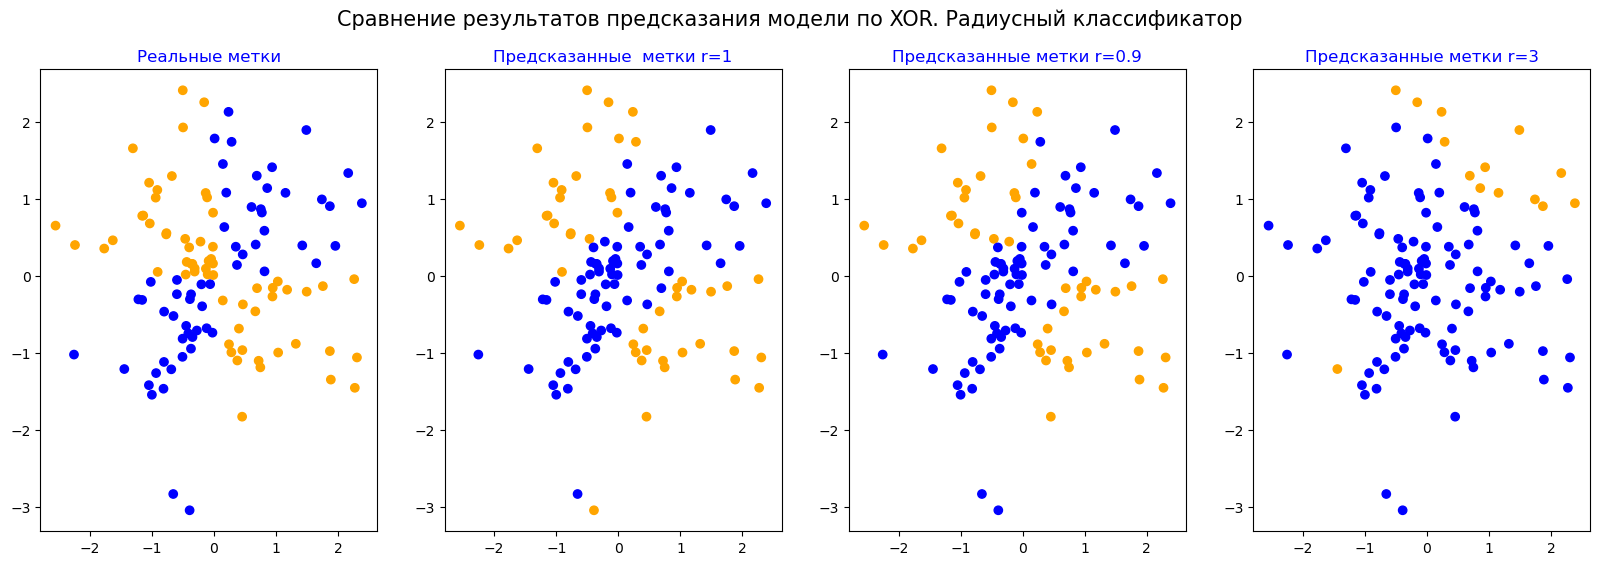

In [271]:
y_pred = pd.Series(y_pred)
y_pred1 = pd.Series(y_pred1)
y_pred2 = pd.Series(y_pred2)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
fig.suptitle('Сравнение результатов предсказания модели по XOR. Радиусный классификатор', size = 15)
axes[0].scatter(X_test['x'], X_test['y'], c = y_test.map({0: 'orange', 1: 'blue'}))
axes[0].set_title('Реальные метки', color = 'Blue')

axes[1].scatter(X_test['x'], X_test['y'], c = y_pred.map({0: 'orange', 1: 'blue'}))
axes[1].set_title('Предсказанные  метки r=1', color = 'Blue')

axes[2].scatter(X_test['x'], X_test['y'], c = y_pred1.map({0: 'orange', 1: 'blue'}))
axes[2].set_title('Предсказанные метки r=0.9', color = 'Blue')

axes[3].scatter(X_test['x'], X_test['y'], c = y_pred2.map({0: 'orange', 1: 'blue'}))
axes[3].set_title('Предсказанные метки r=3', color = 'Blue')

In [295]:
r1 = roc_auc_score(y_test, y_pred)
r2 = roc_auc_score(y_test, y_pred1)
r3 = roc_auc_score(y_test, y_pred2)
ROCAUC = pd.DataFrame([r1,r2,r3], columns=['Показатель ROC-AUC моделей'])
ROCAUC['Параметр R моделей'] = [1, 0.9, 3]


<Axes: xlabel='Параметр R моделей', ylabel='Показатель ROC-AUC моделей'>

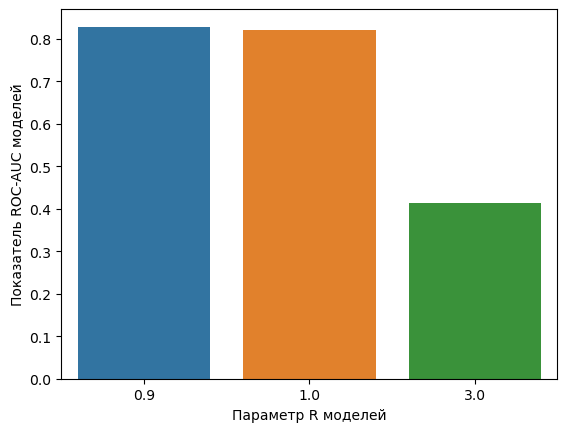

In [297]:
sns.barplot(x = ROCAUC['Параметр R моделей'], y = ROCAUC['Показатель ROC-AUC моделей'])

## Circles, Outliers, Moons

In [305]:
names = ['Circles', 'Outliers', 'Moon']
names[0]

'Circles'

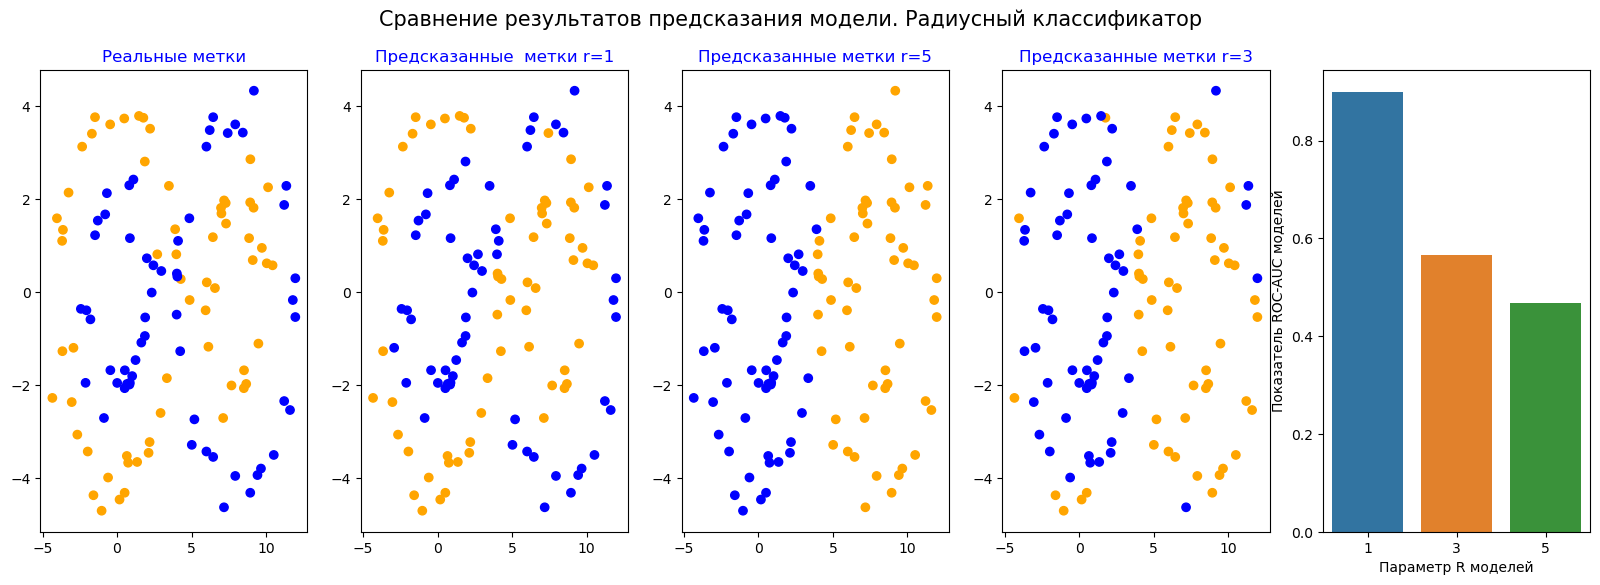

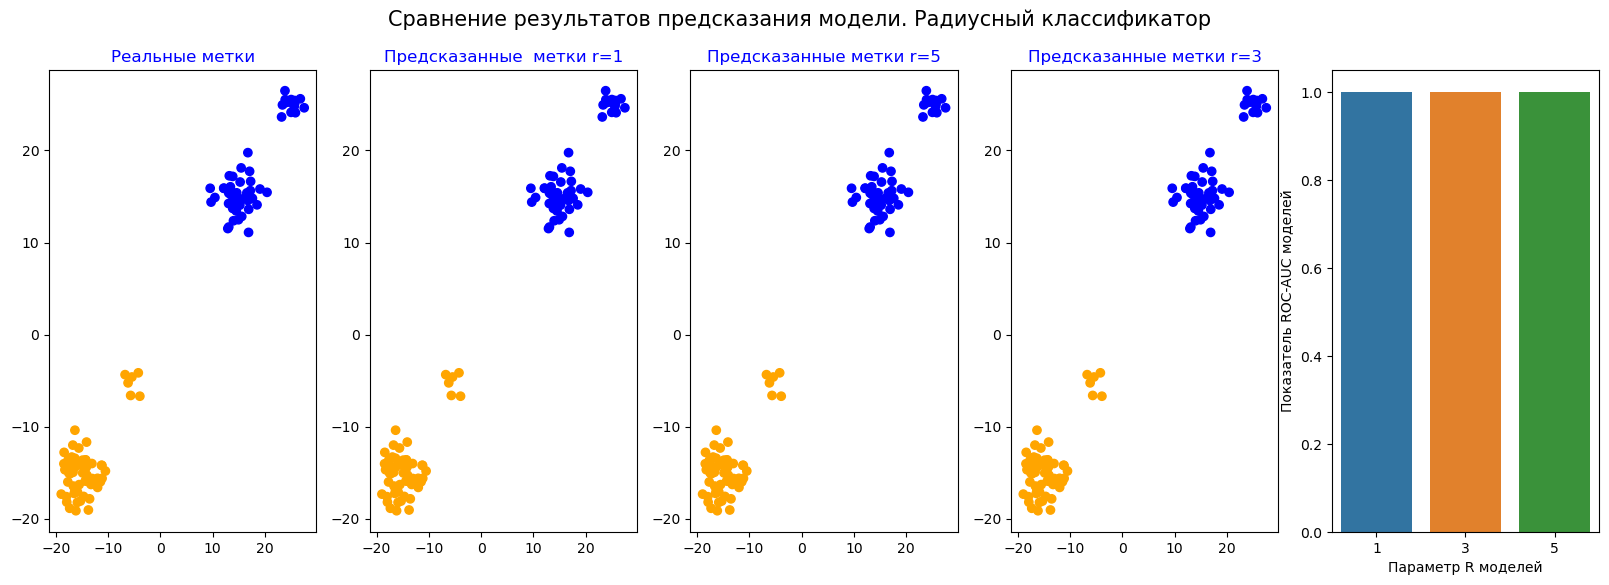

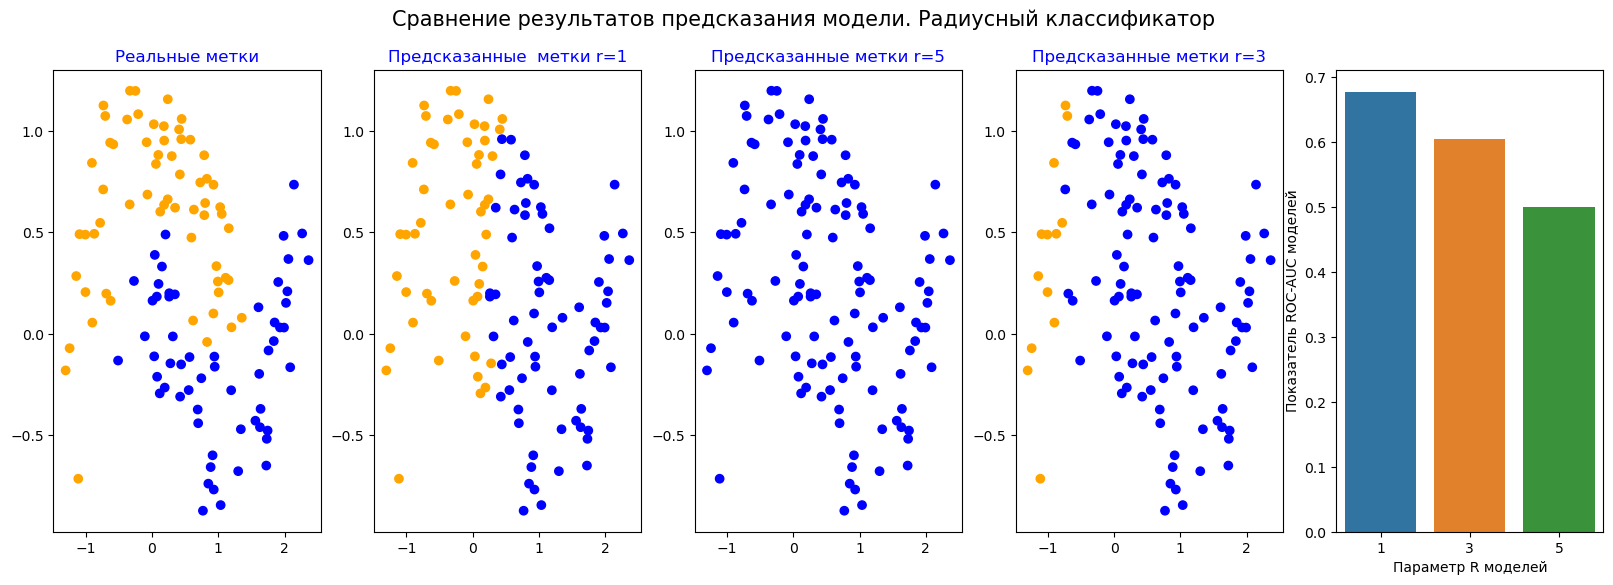

In [322]:
datasets = [Circles, Outliers, Moon]
for dataset in datasets:

    X = dataset.drop('ymain', axis = 1)
    y = dataset['ymain']

    #Сплит
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #Модель с радиусом 1
    clf = RadiusNeighborsClassifier(radius=2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #Учим модель с другими параметрами R
    clf1 = RadiusNeighborsClassifier(radius=5)
    clf1.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)

    clf2 = RadiusNeighborsClassifier(radius=3)
    clf2.fit(X_train, y_train)
    y_pred2 = clf2.predict(X_test)

    #Визуализация
    y_pred = pd.Series(y_pred)
    y_pred1 = pd.Series(y_pred1)
    y_pred2 = pd.Series(y_pred2)
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
    fig.suptitle(f'Сравнение результатов предсказания модели. Радиусный классификатор', size = 15)
    axes[0].scatter(X_test['x'], X_test['y'], c = y_test.map({0: 'orange', 1: 'blue'}))
    axes[0].set_title('Реальные метки', color = 'Blue')

    axes[1].scatter(X_test['x'], X_test['y'], c = y_pred.map({0: 'orange', 1: 'blue'}))
    axes[1].set_title('Предсказанные  метки r=1', color = 'Blue')

    axes[2].scatter(X_test['x'], X_test['y'], c = y_pred1.map({0: 'orange', 1: 'blue'}))
    axes[2].set_title('Предсказанные метки r=5', color = 'Blue')

    axes[3].scatter(X_test['x'], X_test['y'], c = y_pred2.map({0: 'orange', 1: 'blue'}))
    axes[3].set_title('Предсказанные метки r=3', color = 'Blue')
    
        #Визуализация скоров
    r1 = roc_auc_score(y_test, y_pred)
    r2 = roc_auc_score(y_test, y_pred1)
    r3 = roc_auc_score(y_test, y_pred2)
    ROCAUC = pd.DataFrame([r1,r2,r3], columns=['Показатель ROC-AUC моделей'])
    ROCAUC['Параметр R моделей'] = [1, 5, 3]
    sns.barplot(x = ROCAUC['Параметр R моделей'], y = ROCAUC['Показатель ROC-AUC моделей'])



### Сравнение моделей по взвешенному KNN с разными весами

In [323]:
from sklearn.neighbors import KNeighborsClassifier

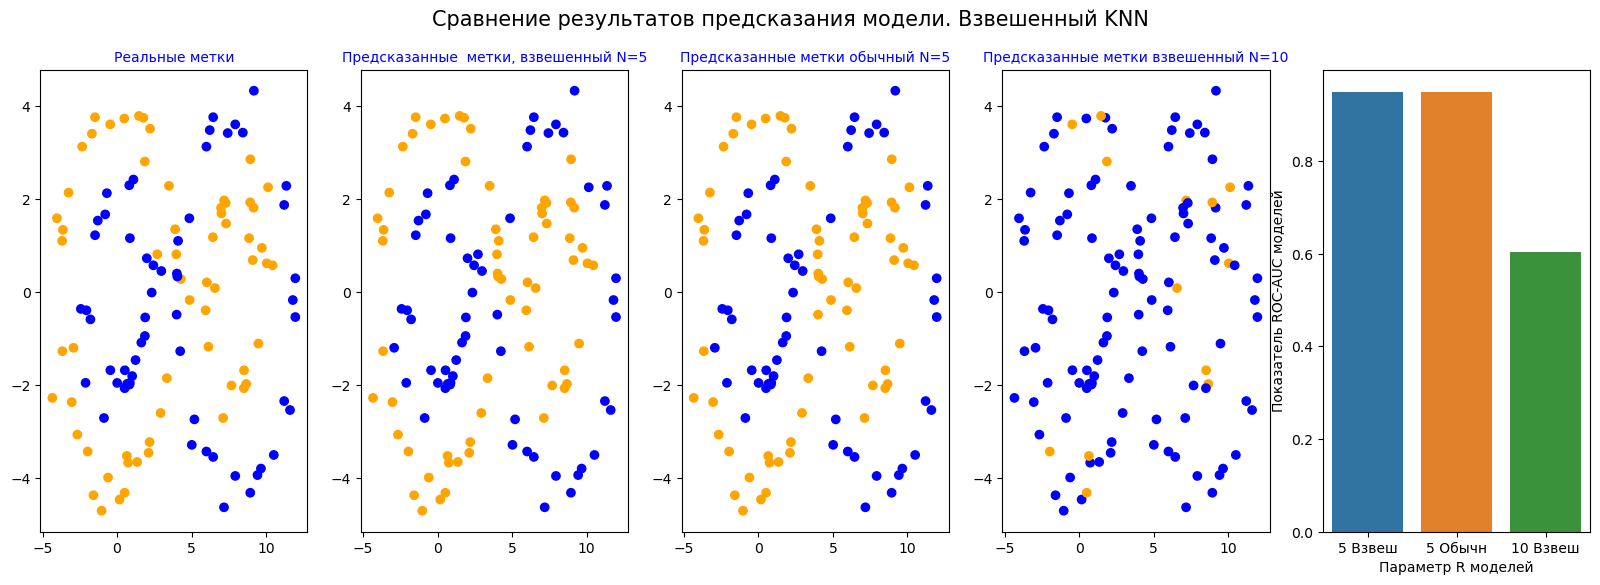

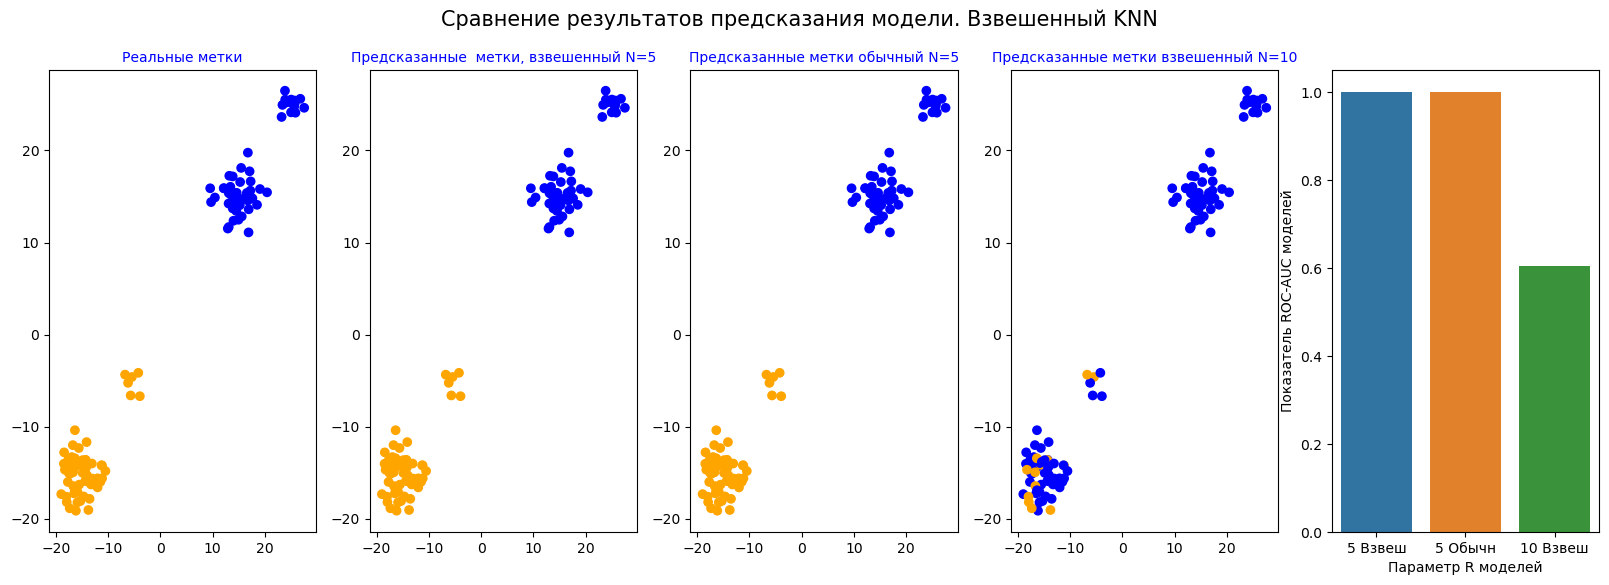

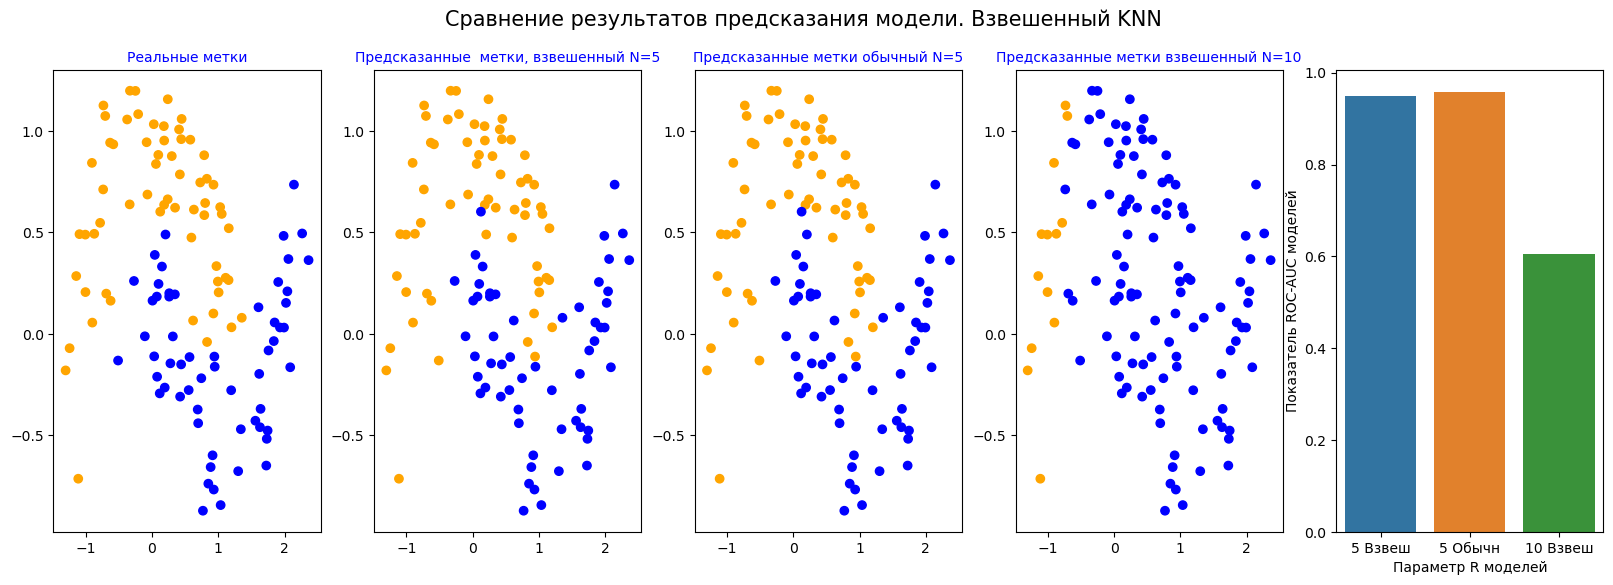

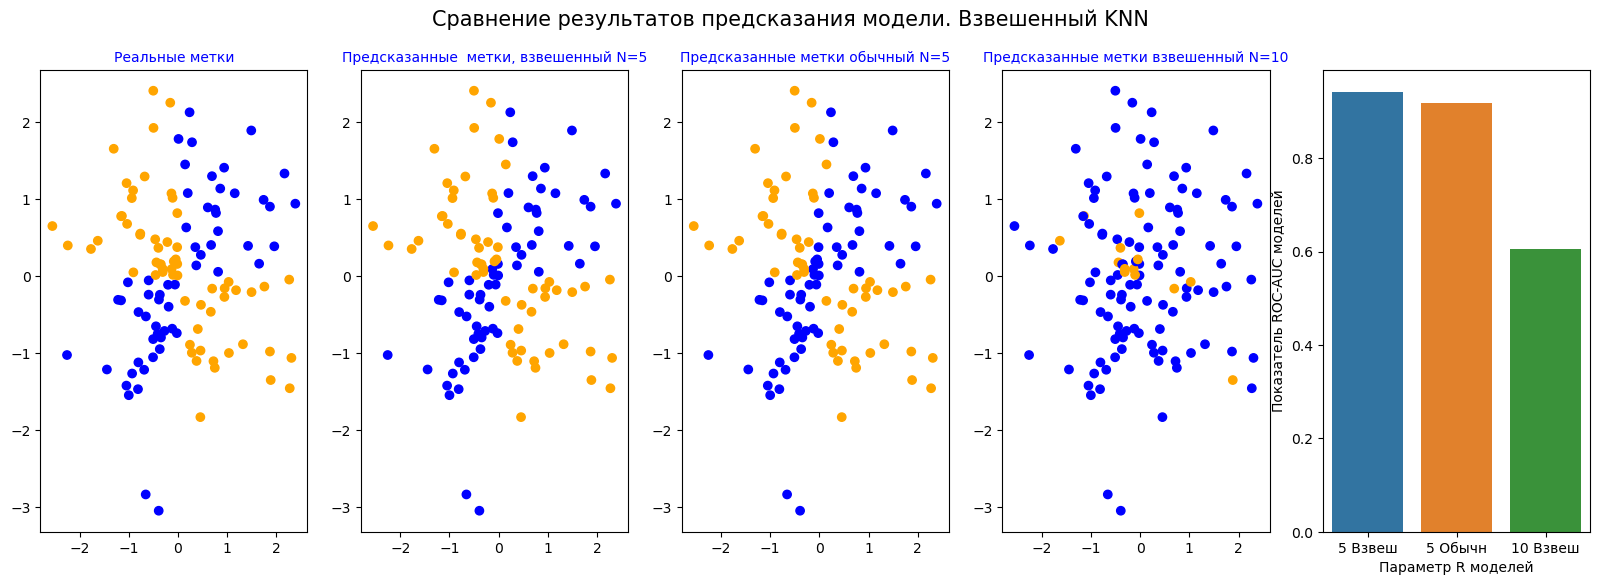

In [328]:
datasets = [Circles, Outliers, Moon, XOR]
for dataset in datasets:

    X = dataset.drop('ymain', axis = 1)
    y = dataset['ymain']

    #Сплит
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #Модель с радиусом 1
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    #Учим модель с другими параметрами 
    knn1 = KNeighborsClassifier(n_neighbors=5)
    knn1.fit(X_train, y_train)
    y_pred1 = knn1.predict(X_test)

    knn2 = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn2.fit(X_train, y_train)
    y_pred1 = knn2.predict(X_test)

    #Визуализация
    y_pred = pd.Series(y_pred)
    y_pred1 = pd.Series(y_pred1)
    y_pred2 = pd.Series(y_pred2)
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
    fig.suptitle(f'Сравнение результатов предсказания модели. Взвешенный KNN', size = 15)
    axes[0].scatter(X_test['x'], X_test['y'], c = y_test.map({0: 'orange', 1: 'blue'}))
    axes[0].set_title('Реальные метки', color = 'Blue', size = 10)

    axes[1].scatter(X_test['x'], X_test['y'], c = y_pred.map({0: 'orange', 1: 'blue'}))
    axes[1].set_title('Предсказанные  метки, взвешенный N=5', color = 'Blue', size = 10)

    axes[2].scatter(X_test['x'], X_test['y'], c = y_pred1.map({0: 'orange', 1: 'blue'}))
    axes[2].set_title('Предсказанные метки обычный N=5', color = 'Blue', size = 10)

    axes[3].scatter(X_test['x'], X_test['y'], c = y_pred2.map({0: 'orange', 1: 'blue'}))
    axes[3].set_title('Предсказанные метки взвешенный N=10', color = 'Blue', size = 10)
    
        #Визуализация скоров
    r1 = roc_auc_score(y_test, y_pred)
    r2 = roc_auc_score(y_test, y_pred1)
    r3 = roc_auc_score(y_test, y_pred2)
    ROCAUC = pd.DataFrame([r1,r2,r3], columns=['Показатель ROC-AUC моделей'])
    ROCAUC['Параметр R моделей'] = ['5 Взвеш', '5 Обычн', '10 Взвеш']
    sns.barplot(x = ROCAUC['Параметр R моделей'], y = ROCAUC['Показатель ROC-AUC моделей'])

